# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [90]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [91]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])
# df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)
# df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
# df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
# df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: STATE_REVENUE

How many years of data are logged in our dataset? 

In [92]:
df['YEAR'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [93]:
statesDF = df.groupby('STATE')
statesDF['STATE_REVENUE'].mean()['MICHIGAN'] > statesDF['STATE_REVENUE'].mean()['OHIO'] 

True

Find the average for your outcome score across all states in 2019

In [94]:
statesDF['STATE_REVENUE'].mean().mean()

4223742.902745098

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [95]:
statesDF['STATE_REVENUE'].max().dropna()

STATE
ALABAMA                  4649053.0
ALASKA                   2026555.0
ARIZONA                  4458836.0
ARKANSAS                 4122377.0
CALIFORNIA              50904567.0
COLORADO                 4365019.0
CONNECTICUT              4411204.0
DELAWARE                 1172219.0
DISTRICT_OF_COLUMBIA           0.0
FLORIDA                 11830218.0
GEORGIA                  8771192.0
HAWAII                   2710361.0
IDAHO                    1459554.0
ILLINOIS                12053316.0
INDIANA                  7780711.0
IOWA                     3583134.0
KANSAS                   3967809.0
KENTUCKY                 4269100.0
LOUISIANA                3588546.0
MAINE                    1122001.0
MARYLAND                 6334951.0
MASSACHUSETTS            6808436.0
MICHIGAN                11383198.0
MINNESOTA                7887346.0
MISSISSIPPI              2411621.0
MISSOURI                 4568867.0
MONTANA                   851068.0
NEBRASKA                 1437048.0
NEVADA        

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [96]:
X = df[['ENROLL_PREK', 'ENROLL_KINDER','ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'AVG_READING_8_SCORE', 'YEAR']].dropna()
y = df.loc[X.index]['STATE_REVENUE']

Feature engineering justification: I would think that higher grade test scores (middle school) would be interesting predictors which may have some relation to state revenue. Additionally, I think the current year and number of enrolled students would also have an impact on state revenue so I chose these predictors.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='YEAR', ylabel='STATE_REVENUE'>

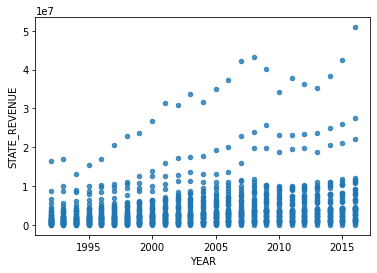

In [97]:
df.plot.scatter(x='YEAR', y='STATE_REVENUE', alpha=0.8)

AVG_MATH_8_SCORE vs STATE_REVENUE

It seems that maybe this was not a good predictor after all. There seems to be little correlation between the two variables.

**Visualization 2**

<AxesSubplot:xlabel='ENROLL_ALL', ylabel='STATE_REVENUE'>

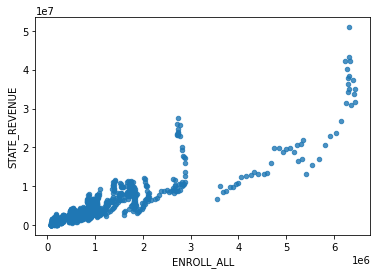

In [98]:
df.plot.scatter(x='ENROLL_ALL', y='STATE_REVENUE', alpha=0.8)

Total State Enrollment vs STATE_REVENUE

State enrollment seems to have a positive correlation with revenue. However, there are a few outliers, where certain states that have less enrollement end up having a much larger revenue than similar states. This is likely due to state laws differing for school revenue.


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [104]:
from sklearn.model_selection import train_test_split

In [108]:
X = df[['ENROLL_PREK', 'ENROLL_KINDER','ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'AVG_READING_8_SCORE', 'YEAR']].dropna()
y = df.loc[X.index]['STATE_REVENUE']
y.fillna(y.mean(), inplace=True)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [119]:
# import your sklearn class here
from sklearn import tree

In [120]:
# create your model here
model = tree.DecisionTreeRegressor()


In [124]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [125]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [126]:
print("Score:" + str(model.score(X_test, y_test)))
print("Mean Abs Error:" + str(np.mean(np.abs(model.predict(X_test)-y_test))))
print("MSE:" + str(np.mean(np.abs(model.predict(X_test)-y_test))))

Score:0.9414344226950588
Mean Abs Error:633692.7214242779
MSE:633692.7214242779


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

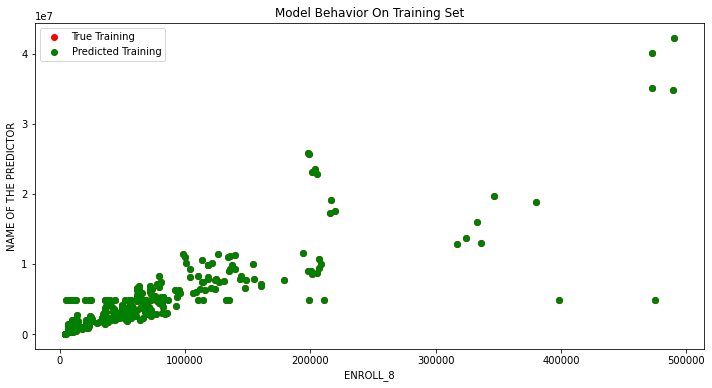

In [131]:
col_name = 'ENROLL_8'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

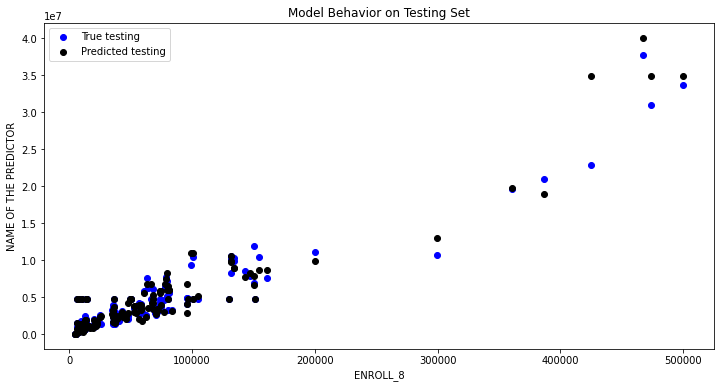

In [132]:
col_name = 'ENROLL_8'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In this checkpoint I analyzed the states_edu.csv dataset, contains a variety of data related to statewide education. This includes federal, state, and local revenue, state expenditures, student enrollment for grades pre-k, 6th grade, 8th grade and 12th grade, as well as average 4th and 8th grade math and reading scores. In exploring the dataset, I was able to determine 